Accuracy: 86.96486856947026


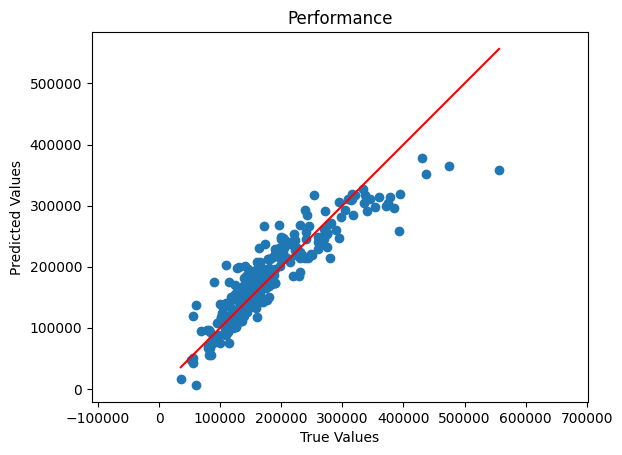

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data
train = pd.read_csv('train.csv')

# Seperating Features and Aim
X_train = train.iloc[:, 0:10].values # Features -- Col 1 to 10
y_train = train.iloc[:, 10].values # Aim -- Col 11

# Standardize the features (mean=0, std=1)
# Copied from ChatGPT as Code did not Work Without the Below Statement
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

X_train = np.c_[np.ones(X_train.shape[0]), X_train] # Add Col for Intercept
coefficients = np.zeros(X_train.shape[1])

# Assume Standard Values
learning_rate = 0.1
epochs = 1000

# Using LMS Algo 
for e in range(epochs):
    value = np.dot(X_train, coefficients)
    errors = y_train - value
    coefficients += learning_rate * np.dot(errors, X_train) / len(y_train) # LMS Formula

# Read Data 
test = pd.read_csv('test.csv')

# Seperating Features and Aim
X_test = test.iloc[:, 0:10].values # Features -- Col 1 to 10
y_test = test.iloc[:, 10].values # Aim -- Col 11

# Standardize the features (mean=0, std=1)
# Copied from ChatGPT as Code did not Work Without the Below Statement
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

X_test = np.c_[np.ones(X_test.shape[0]), X_test] # Add Col for Intercept
predictions = np.dot(X_test, coefficients)

# Calculating Error
def error(true, false):
    total_error = 0
    total_actual = 0

    for actual, predicted in zip(true, false):
        error = abs(actual - predicted)
        total_error += error # Adding all Errors
        total_actual += abs(actual)

    percentage_error = (total_error / total_actual) * 100
    return percentage_error

accuracy = 100 - error(y_test, predictions) # Calculating Accuracy
print('Accuracy:', accuracy)

# Scatter plot for actual vs predicted values
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Performance')
plt.axis('equal')
plt.show()